# Importing the Library

In [59]:
import pandas as pd # for working with dataframes
import numpy as np # for numerical computations
from sklearn.linear_model import LinearRegression # for fitting linear regression models
import matplotlib # for visualization
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns # for visualization
import datetime # for working with dates
import calendar # for working with dates
import statsmodels # for statistical modeling
import statsmodels.api as sm # for statistical modeling
from sklearn.metrics import mean_squared_error # for evaluating model performance
from sklearn.metrics import r2_score # for evaluating model performance
from sklearn.preprocessing import MinMaxScaler, StandardScaler # for scaling the data
from sklearn.model_selection import train_test_split # for splitting the data into train and test sets
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # for classification models
from sklearn.linear_model import LogisticRegression # for logistic regression models
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report # for evaluating classification models
from sklearn.ensemble import IsolationForest # for detecting anomalies
from scipy import stats # for statistical analysis

# Loading the dataset as dataframe

In [60]:
df= pd.read_csv("C:\lpu\semester 5\eda and sql\googleplaystore.csv")

In [61]:
rows = df.shape[0] # returns the number of rows
columns = df.shape[1] # returns the number of columns

# Printing the number of rows and the column in the dataset

In [65]:
print('there are {} rows and {} columns in the dataset'.format(rows,columns))
print(df.shape)

there are 10841 rows and 13 columns in the dataset
(10841, 13)


In [66]:
df.head(8)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up


In [67]:
df.columns= [c.replace(' ','_')for c in df.columns] #Replace spaces in column names with underscores in the dataframe "df"

# Finding the null values in the dataset

In [68]:
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [70]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [71]:
df.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10822,PLMGSS FR,PRODUCTIVITY,NaN,0,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up
10823,List iptv FR,VIDEO_PLAYERS,NaN,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


In [72]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [73]:
pd.set_option('display.max_columns', None) # display all columns
df.sample(5) # display 5 random rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2758,zulily - Shop Daily Deals in Fashion and Home,SHOPPING,4.5,28560,Varies with device,"1,000,000+",Free,0,Everyone,Shopping,"July 23, 2018",Varies with device,Varies with device
7989,The CW TV app,FAMILY,3.2,24,4.8M,"5,000+",Free,0,Everyone,Entertainment,"July 28, 2018",1.1,3.2 and up
4062,Broken Screen Prank,FAMILY,3.3,23682,9.8M,"1,000,000+",Free,0,Teen,Casual,"June 14, 2018",6.2,4.0 and up
975,HBO NOW: Stream TV & Movies,ENTERTAINMENT,3.9,61201,Varies with device,"10,000,000+",Free,0,Teen,Entertainment,"July 19, 2018",Varies with device,Varies with device
5870,AZ Browser. Private & Download,COMMUNICATION,4.4,1520,5.2M,"100,000+",Free,0,Everyone,Communication,"December 31, 2016",1.4,4.4 and up


Looking for unique values in category column

In [74]:
pd.unique(df['Category'])

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Defining the function to veiw the insights of the dataset

In [75]:
def printinfo():
    # Create a temporary dataframe with column names as the index
    temp = pd.DataFrame(index=df.columns)
    # Add columns to the temporary dataframe with the datatype, number of null values, and number of unique values for each column in "df"
    temp['dataType'] = df.dtypes
    temp['nullCount'] = df.isnull().sum()
    temp['uniqueCount'] = df.nunique()
    # Return the temporary dataframe
    return temp

In [76]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [77]:
printinfo()

,dataType,nullCount,uniqueCount
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content_Rating,object,1,6
Genres,object,0,120


In [78]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

# Finding the rows and columns in Rating having the Null values

In [79]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [80]:
df.loc[34453:54345,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


# Finding and filling the null values in Free columns

In [81]:
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [82]:
df['Type'].fillna("Free",inplace=True)

In [83]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

# Content Rating (cleaning)

finding the null values in content Rating

In [84]:
df[df['Content_Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


looking for the missing value in the content rating

In [85]:
df.loc[34234:54653,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


Droping the row from the column

In [86]:
df.dropna(subset =['Content_Rating'], inplace= True)

# Replaceing the missing values of the Rating Column with the Mode value of that entire column

In [87]:
modeRating=df['Rating'].mode()

In [88]:
df['Rating'].fillna(value=modeRating[0],inplace=True)

In [89]:
printinfo()

,dataType,nullCount,uniqueCount
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content_Rating,object,0,6
Genres,object,0,119


# Column: Size

Converting the Size column to string

In [90]:
df['Size'] = df['Size'].astype(str) 

Removing the + Symbol

In [91]:
df['Size'] = df.Size.apply(lambda x: x.strip('+'))

Removing the , Symbol

In [92]:
df['Size'] = df.Size.apply(lambda x:x.replace(',',''))

 For converting the M to 1000000

In [93]:
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))

Replacing the k by multiplying the value with 1000.

In [94]:
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))

Replacing the Varies with device value with Nan.

In [95]:
df['Size'] = df.Size.replace('Varies with device',np.NaN)

Finally converting to Numeric type.

In [96]:
df['Size'] = pd.to_numeric(df['Size'])

In [97]:
df.dropna(subset = ['Size'], inplace=True)

In [98]:
printinfo()

,dataType,nullCount,uniqueCount
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,4680
Size,float64,0,459
Installs,object,0,20
Type,object,0,2
Price,object,0,87
Content_Rating,object,0,6
Genres,object,0,116


# Column: Installs


Converting the Installs column from object to str

In [99]:
df['Installs']=df.Installs.astype(str)

In [100]:
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10835            10+
10836         5,000+
10837           100+
10838         1,000+
10840    10,000,000+
Name: Installs, Length: 9145, dtype: object

 Removing the + symbol from the values

In [101]:
df['Installs'] =df.Installs.apply(lambda x: x.strip('+'))

Removing the , from the numbers.

In [102]:
df['Installs'] =df.Installs.apply(lambda x: x.replace(',', ''))


Converting it from string type to numeric type

In [103]:
df['Installs'] = pd.to_numeric(df['Installs'])

In [104]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10835          10
10836        5000
10837         100
10838        1000
10840    10000000
Name: Installs, Length: 9145, dtype: int64

Converting the Installs column from str to float

In [105]:
df['Installs']=df['Installs'].astype(float)

In [106]:
printinfo()

,dataType,nullCount,uniqueCount
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,4680
Size,float64,0,459
Installs,float64,0,20
Type,object,0,2
Price,object,0,87
Content_Rating,object,0,6
Genres,object,0,116


# Column: Price

In [107]:
df['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [108]:
df['Price'] = df.Price.apply(lambda x: x.strip('$'))

In [109]:
df['Price'] = pd.to_numeric(df['Price'])

In [110]:
df["Price"].sum()

10831.029999999999

In [111]:
df.describe()

,Rating,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.151653e+07,7.114842e+06,1.184366
std,0.507267,2.258875e+07,4.619357e+07,17.355754
min,1.000000,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,3.000000e+07,1.000000e+06,0.000000
max,5.000000,1.000000e+08,1.000000e+09,400.000000


# Exploratory Analysis and Visualization



In [113]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=18
matplotlib.rcParams['figure.figsize']=(15,10)
matplotlib.rcParams['figure.facecolor']='cyan'

exploreing the column of object type.

In [114]:
printinfo()

,dataType,nullCount,uniqueCount
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,4680
Size,float64,0,459
Installs,float64,0,20
Type,object,0,2
Price,float64,0,87
Content_Rating,object,0,6
Genres,object,0,116


Value count of the different section in category column

In [115]:
df['Category'].value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

# Top category on playstore

In [116]:
y=df['Category'].value_counts().index
x=df['Category'].value_counts()
xaxis=[]
yaxis=[]
for i in range(len(x)) :
    xaxis.append(x[i])
    yaxis.append(y[i])

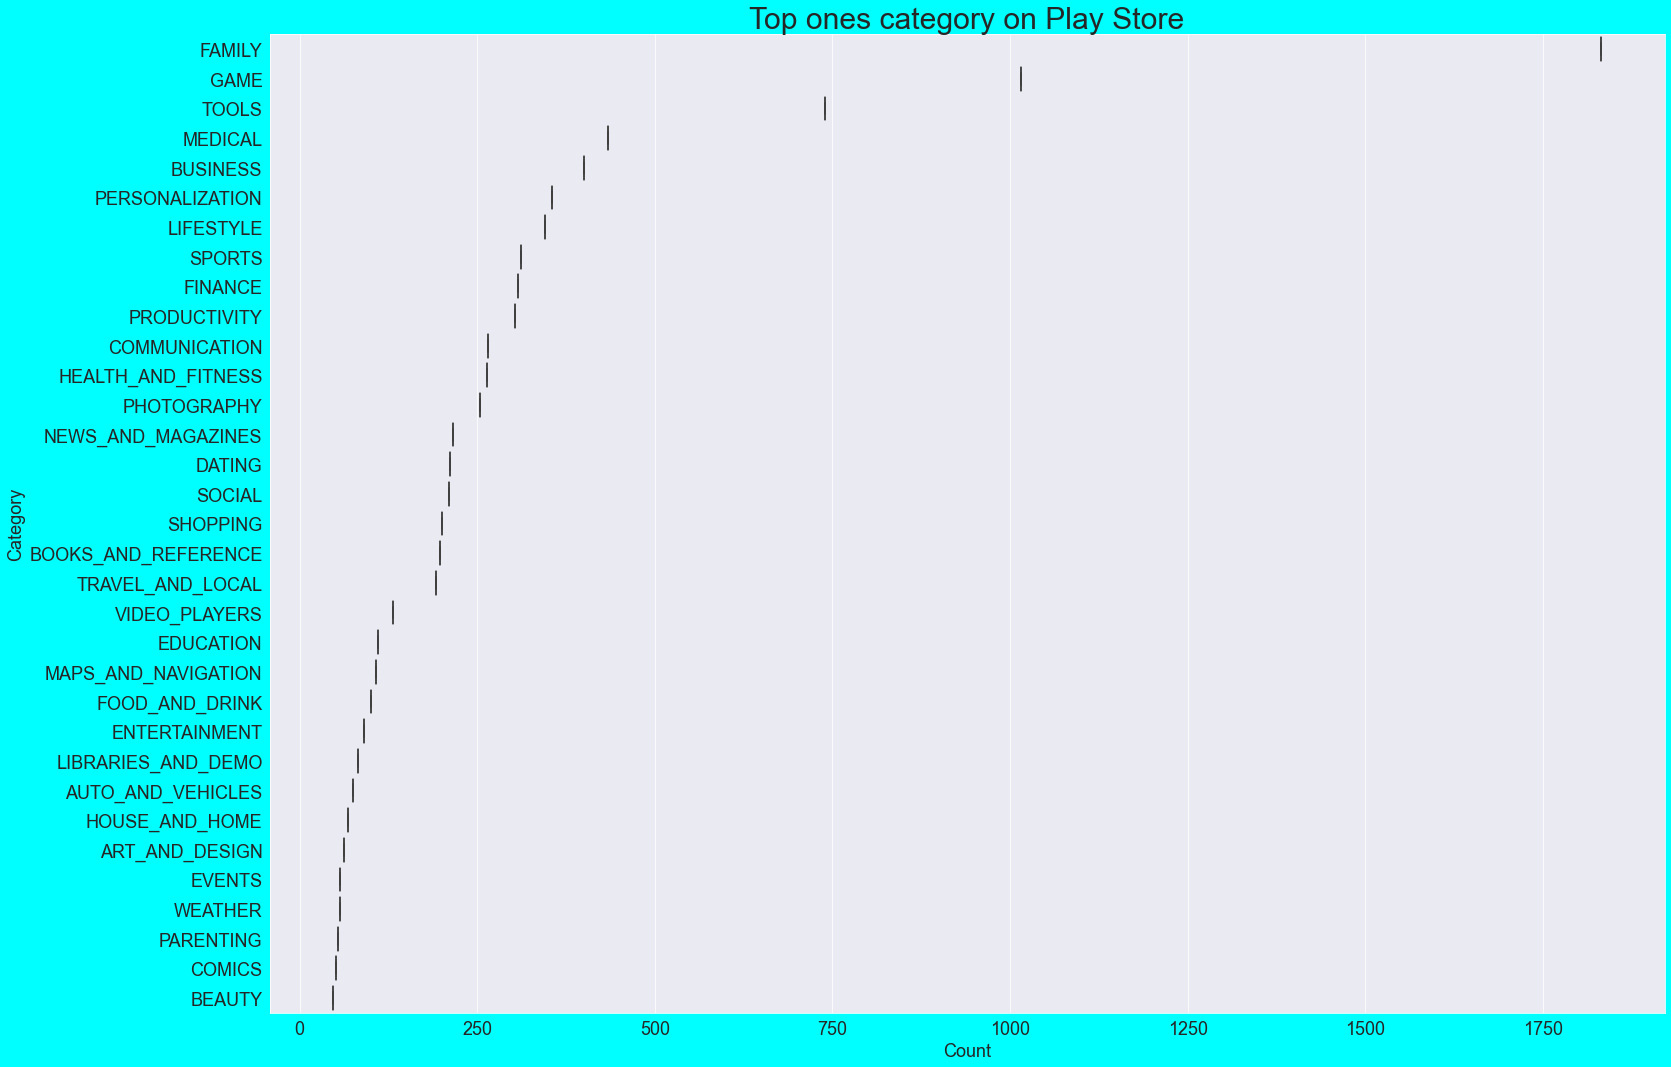

In [117]:
plt.figure(figsize=(25,18))
plt.xlabel('Count')
plt.ylabel('Category')
graph = sns.boxplot(x= xaxis, y = yaxis, palette = "husl")
graph.set_title("Top ones category on Play Store", fontsize = 30);

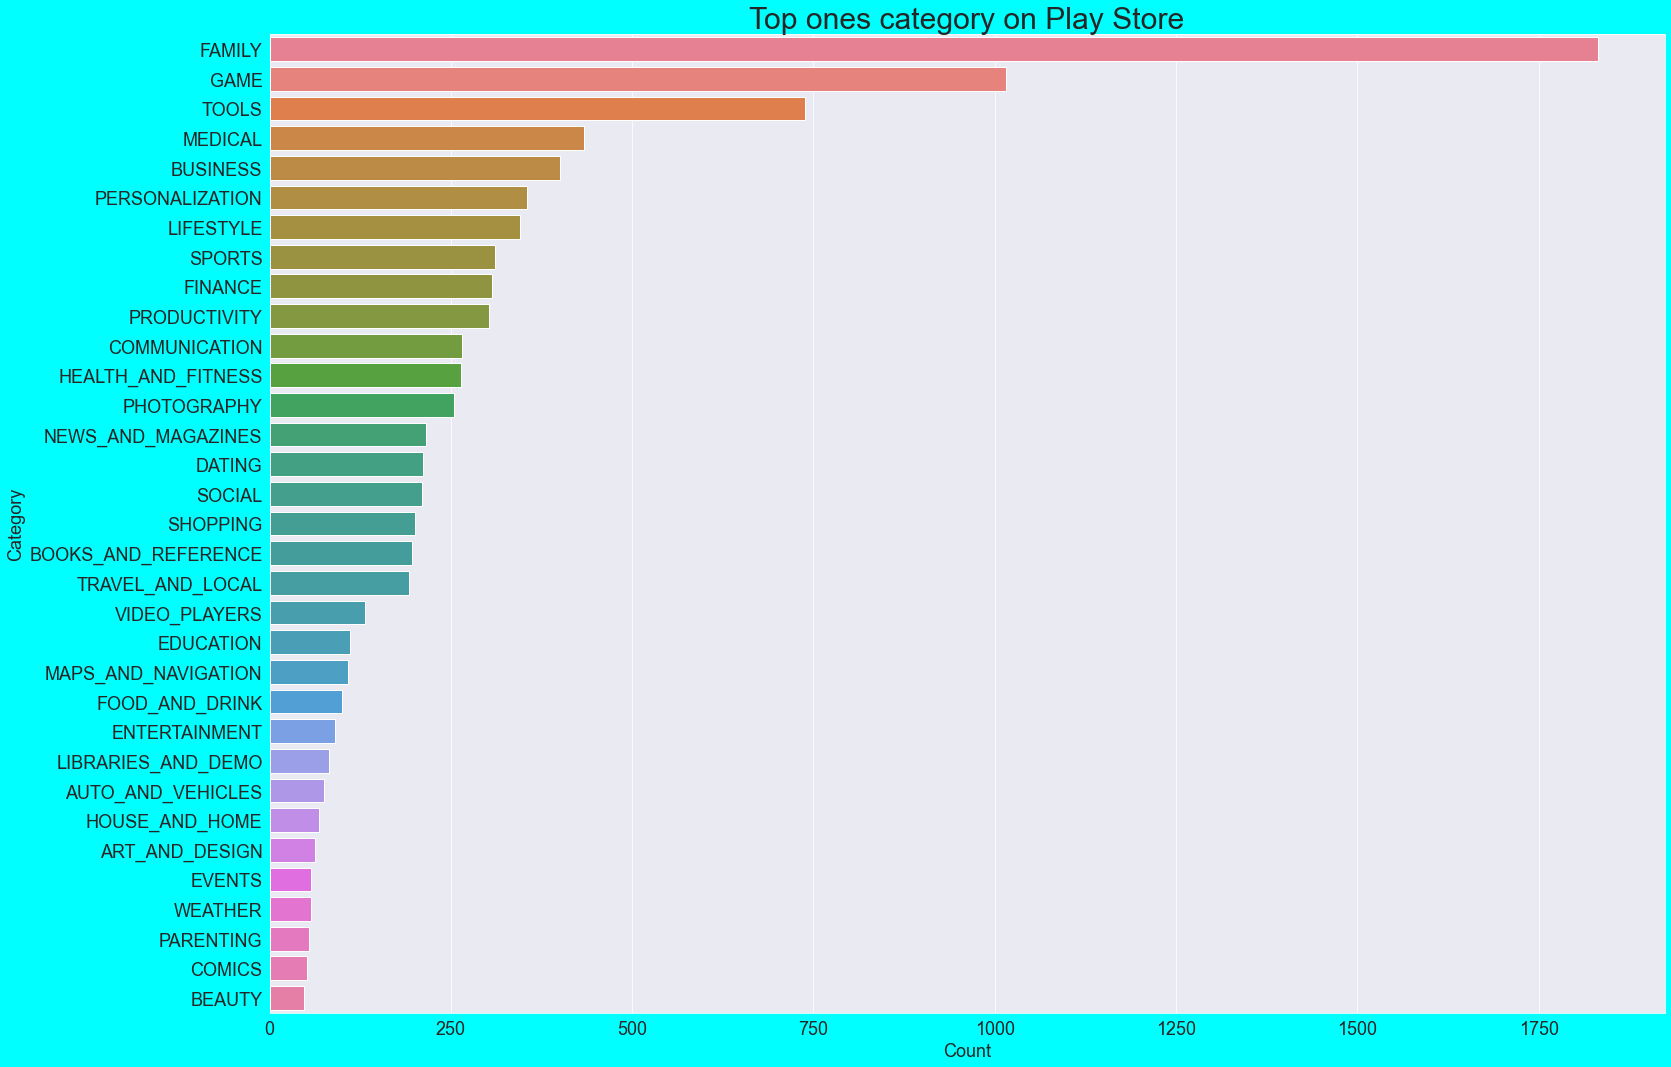

In [118]:
plt.figure(figsize=(25,18))
plt.xlabel('Count')
plt.ylabel('Category')
graph = sns.barplot(x= xaxis, y = yaxis, palette = "husl")
graph.set_title("Top ones category on Play Store", fontsize = 30);

Note-: From the above graphs we come to know that there are total 50 categories in this dataset and the most apps on the playstore falls under the Education and Business  and the least falls under the
comics 

# Which category of Apps from the Content Rating column are found more on playstore

In [119]:
x2= df['Content_Rating'].value_counts().index
y2 =df['Content_Rating'].value_counts()

x2axis=[]
y2axis=[]
for i in range(len(x2)):
    x2axis.append(x2[i])
    y2axis.append(x2[i])

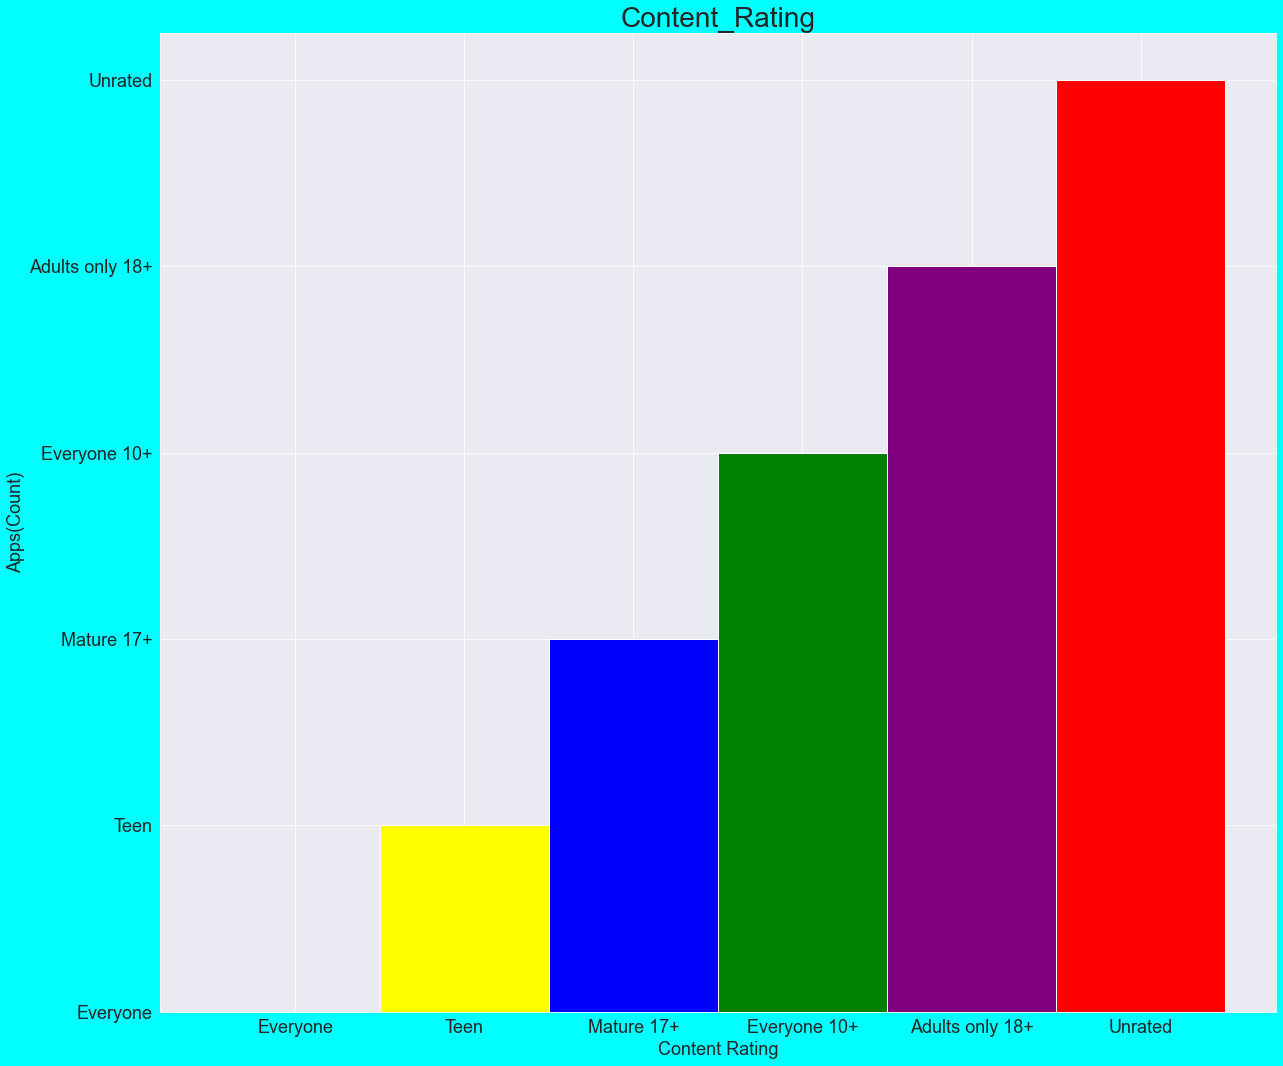

In [120]:
plt.figure(figsize=(20,18))
plt.bar(x2axis,y2axis,width=1,color=['grey','yellow','blue','green','purple','red'],alpha=1);
plt.title('Content_Rating',size = 28);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

Note: From the above plot we can see that Unrated category has the highest number of apps.

# Distribution of the ratings the dataframe.

In [121]:
df['Rating'].describe()

count    9145.000000
mean        4.208868
std         0.507267
min         1.000000
25%         4.100000
50%         4.400000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

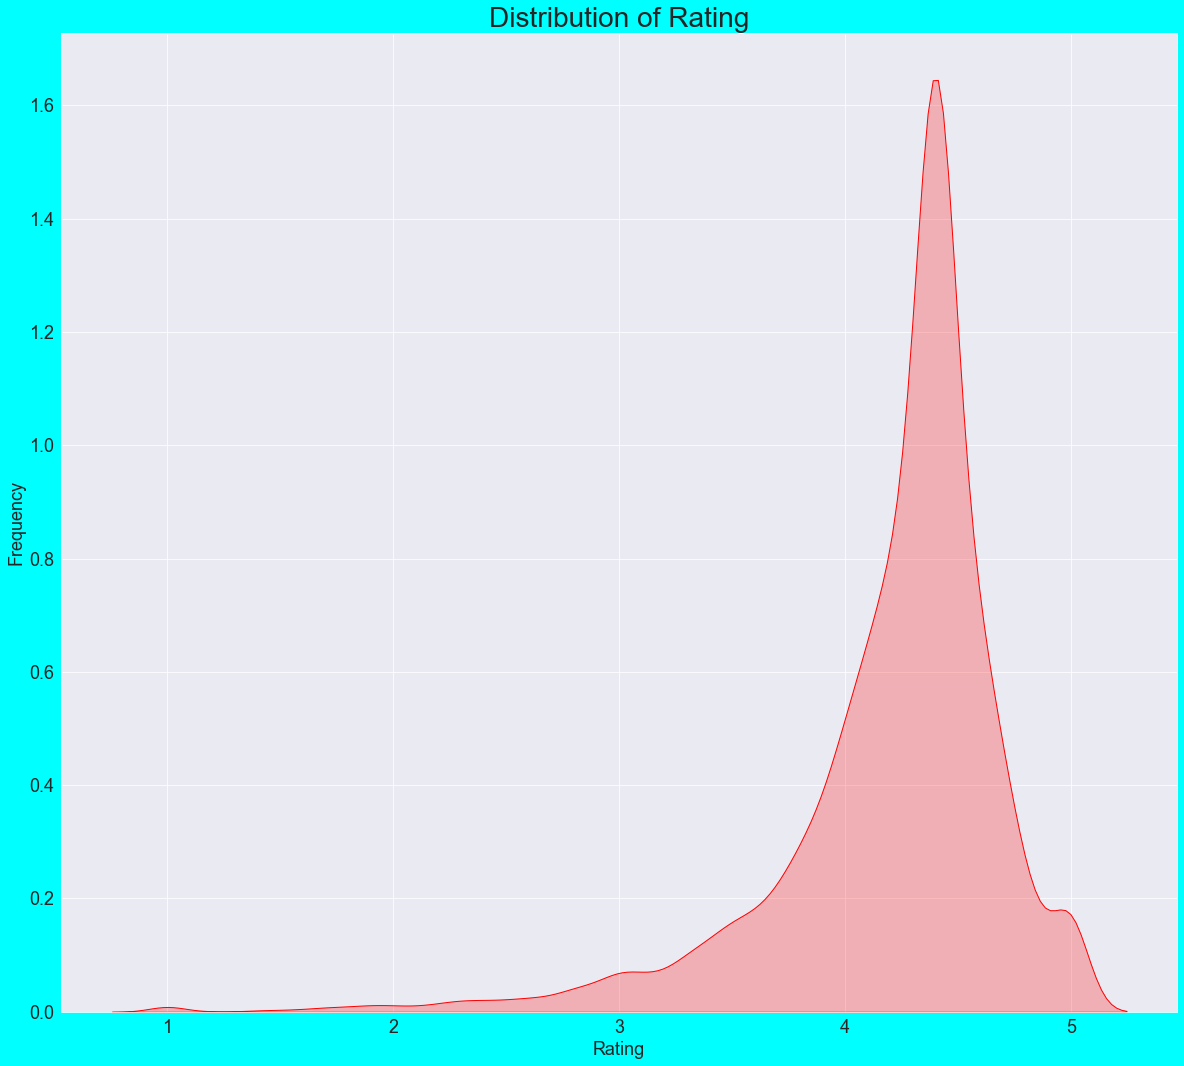

In [122]:
plt.figure(figsize=(20,18))
graph = sns.kdeplot(df.Rating, color = 'red',shade = True)
plt.title('Distribution of Rating',size = 28);
plt.ylabel('Frequency');
plt.xlabel('Rating');

#  The apps in playstore are paid or free

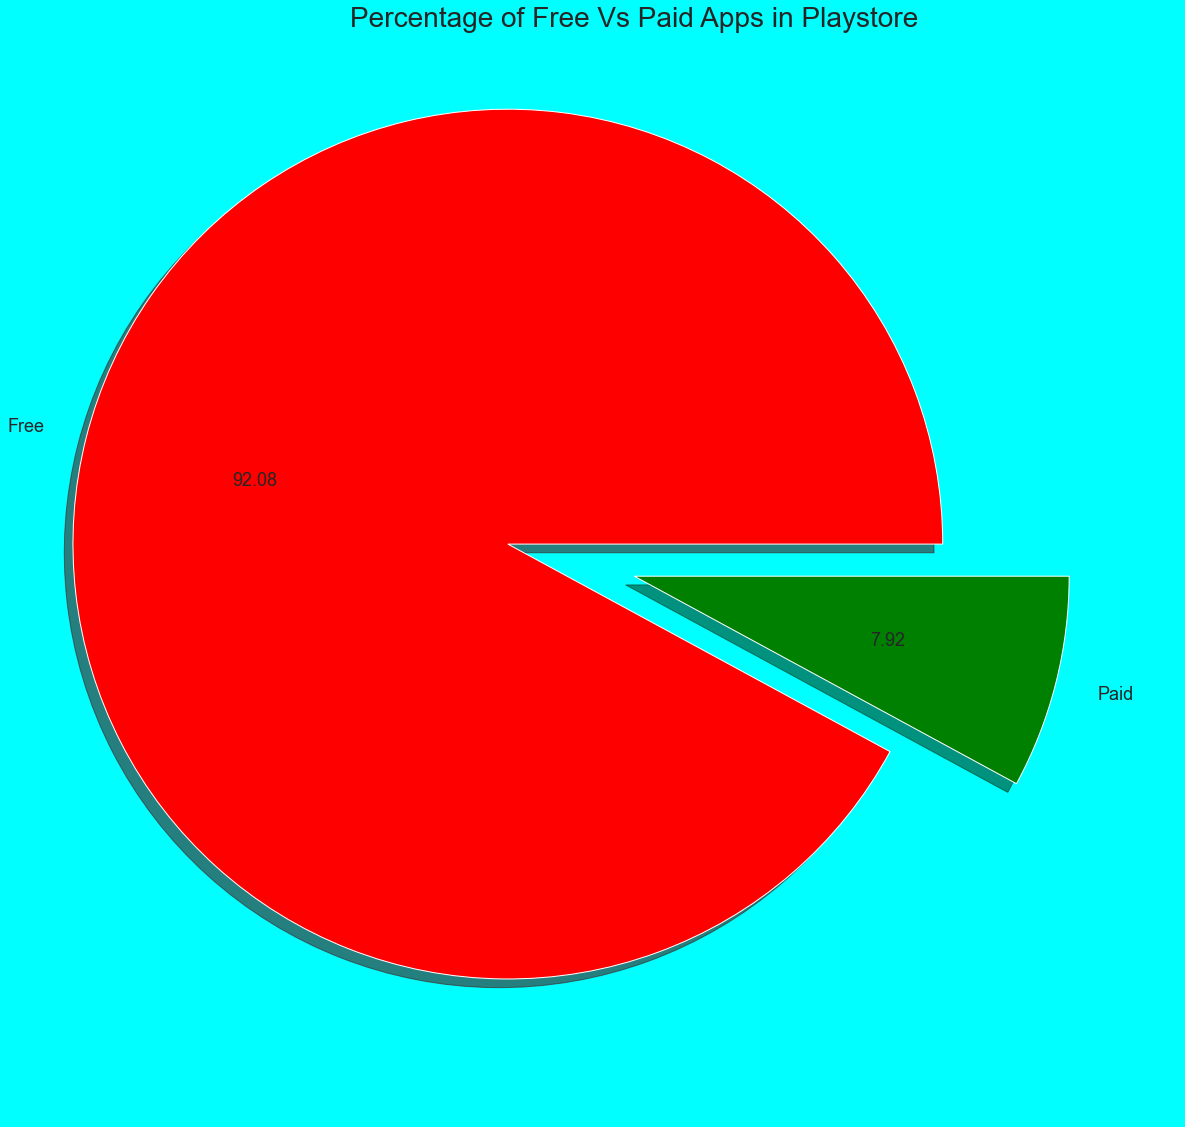

In [123]:
plt.figure(figsize=(20,20))
labels=df['Type'].value_counts(sort =True).index
sizes =df['Type'].value_counts(sort=(True))
colors = ["red","green"]
explode =(0.3,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors ,autopct='%2.2f',shadow = True, startangle=0)
plt.title('Percentage of Free Vs Paid Apps in Playstore',size=28)
plt.show()

Note: From the above graph we can see that 92.08%(Approx.) of apps in google play store are free and 7.92%(Approx.) are paid.

# Which category App's have most number of installs?

In [124]:
highest__Installs_df=df.groupby('Category')[['Installs']].sum().sort_values(by='Installs',ascending=False)

In [125]:
highest__Installs_df.head()

,Installs
Category,
GAME,2.987456e+10
FAMILY,6.798793e+09
COMMUNICATION,4.941943e+09
NEWS_AND_MAGAZINES,4.252006e+09
TOOLS,3.527095e+09


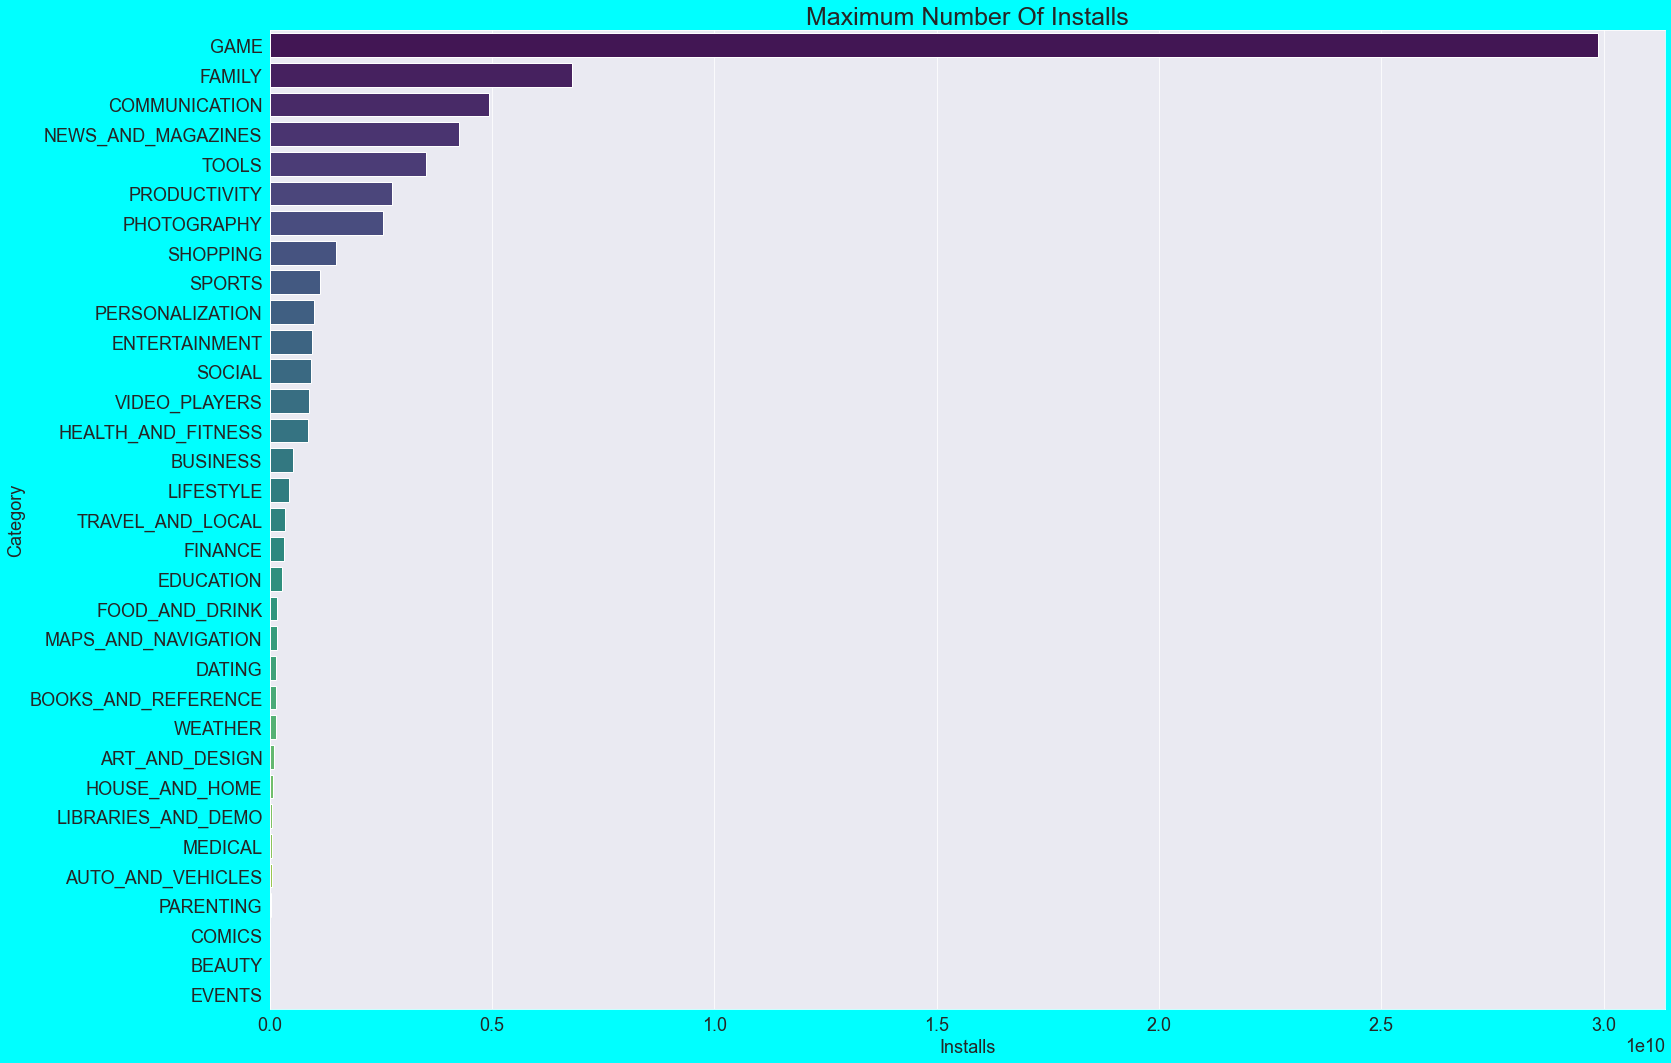

In [126]:
x2axis=[]
y2axis=[]
for i in range (len(highest__Installs_df)):
    x2axis.append(highest__Installs_df.Installs[i])
    y2axis.append(highest__Installs_df.index[i])
plt.figure(figsize=(25,18))
plt.xlabel("Installs")
plt.ylabel("Category")
graph=sns.barplot(x=x2axis,y=y2axis, alpha =1,palette = "viridis")
graph.set_title('Maximum Number Of Installs', fontsize = 25);


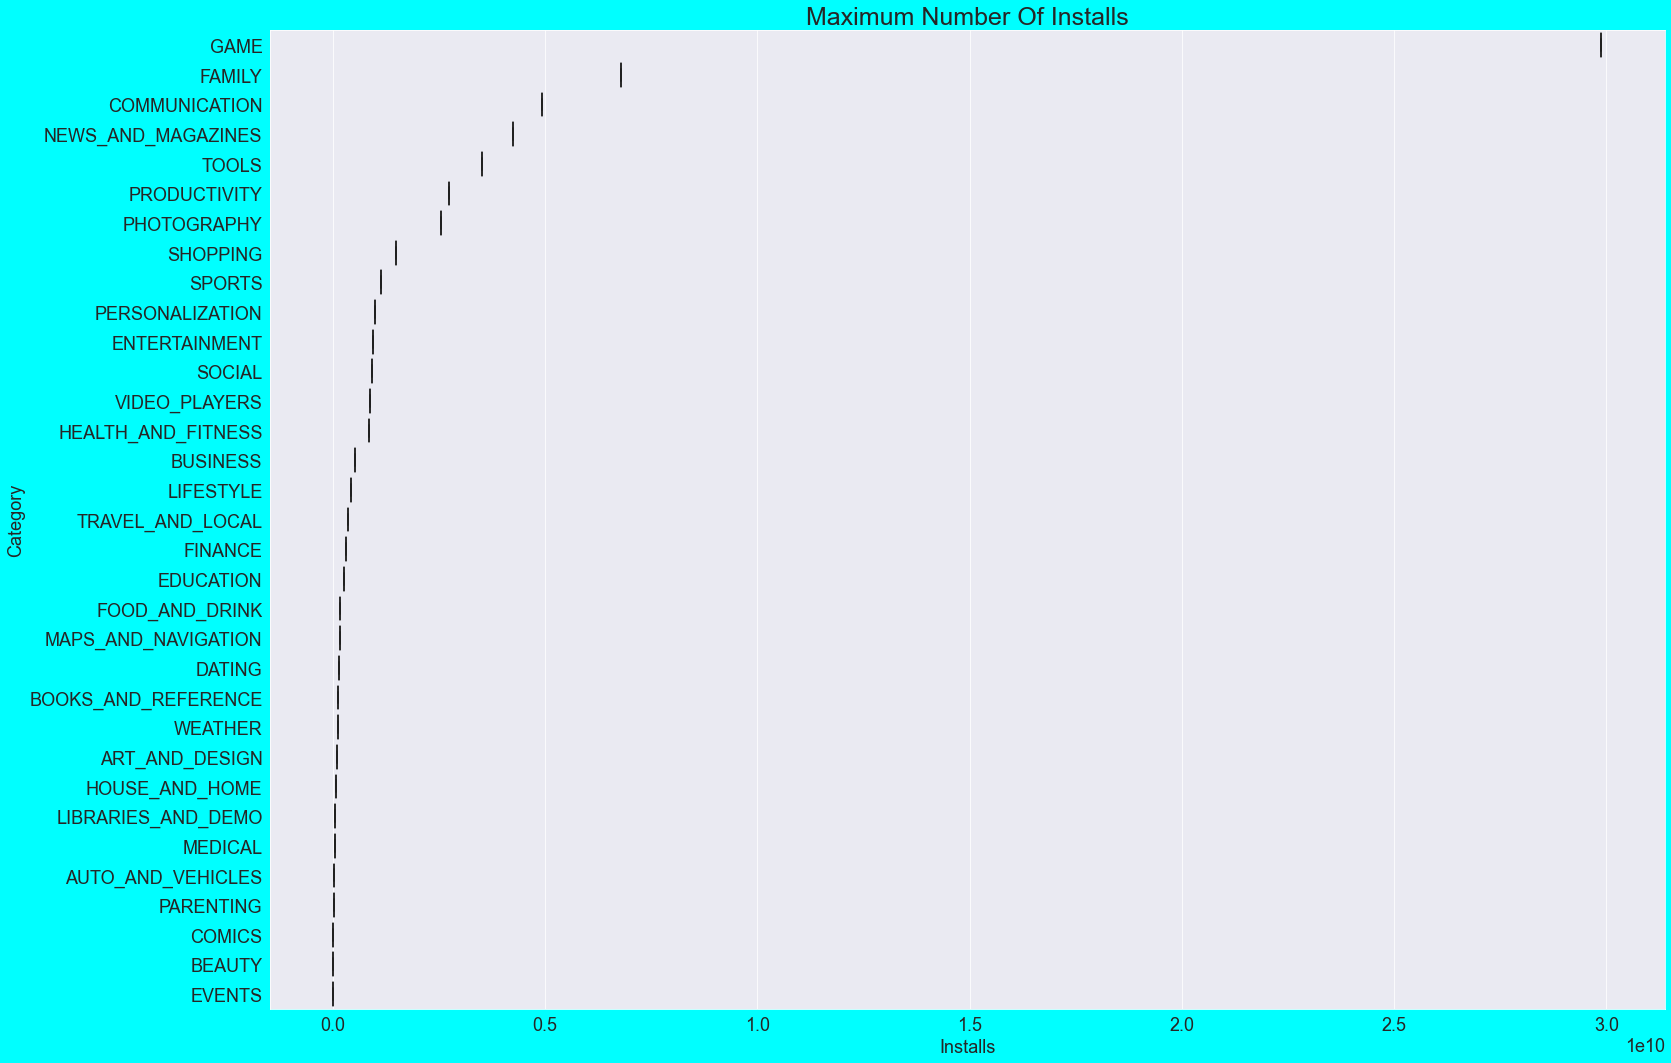

In [127]:
x2axis=[]
y2axis=[]
for i in range (len(highest__Installs_df)):
    x2axis.append(highest__Installs_df.Installs[i])
    y2axis.append(highest__Installs_df.index[i])
plt.figure(figsize=(25,18))
plt.xlabel("Installs")
plt.ylabel("Category")
graph=sns.boxplot(x=x2axis,y=y2axis,palette = "viridis")
graph.set_title('Maximum Number Of Installs', fontsize = 25);

Note: From the above visualization, it can be interpreted that the top categories with highest installs are Tools,Action,Arcade,Casual.

#  What are the Top 10 installed apps in any category?

In [128]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

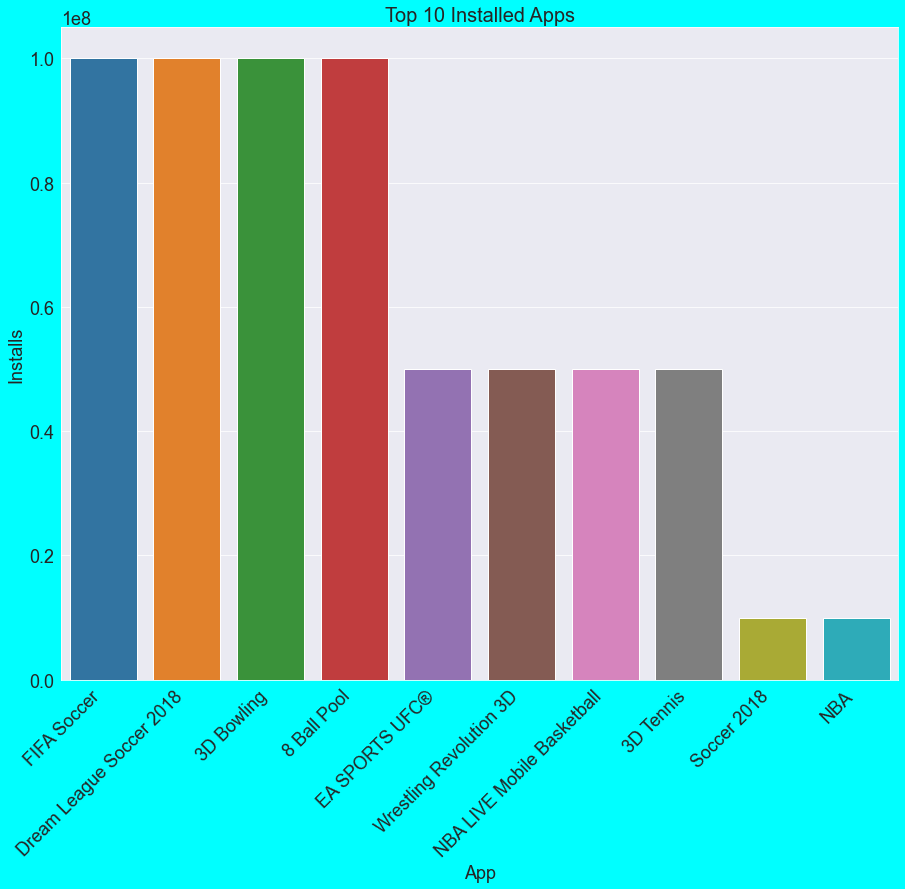

In [129]:
findtop10incategory('Sports')

C In the same way we by passing different category names to the function, we can get the top 10 installed apps.

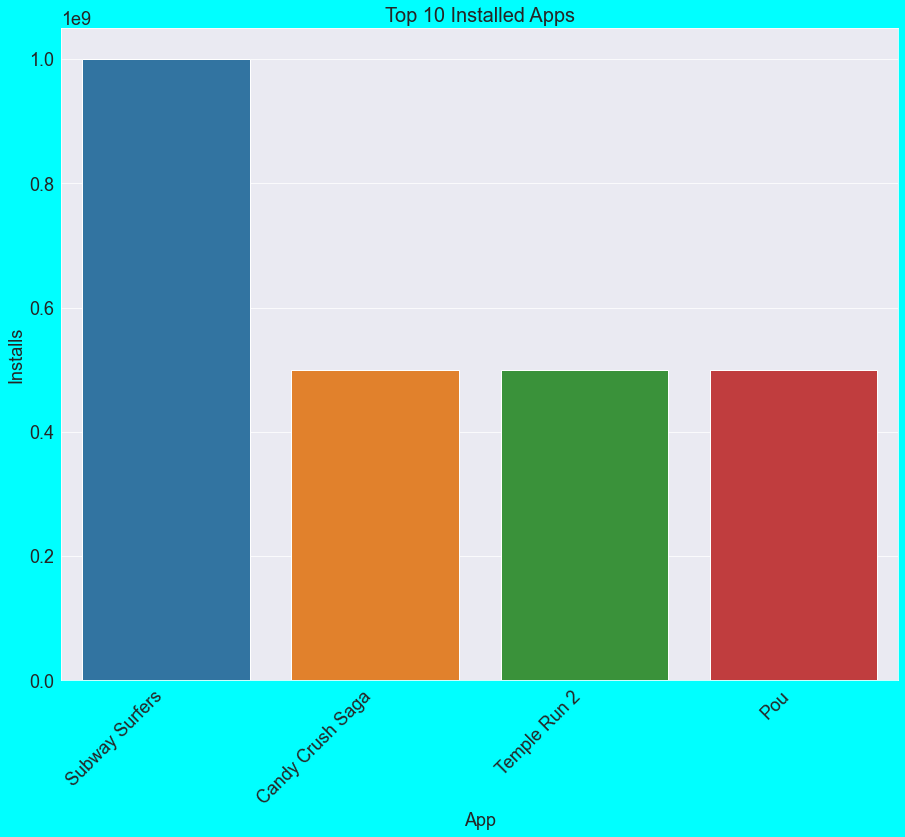

In [130]:
findtop10incategory('Game')

Note: From the above graph we can see that in the Sports category Subway Surfers has the highest installs.

#  Which are the Apps with highest number of rating?

In [131]:
AppwithHighestrev=df.sort_values(by='Rating',ascending=False).head(10)
AppwithHighestrev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
6396,Bk Usha behn,LIFESTYLE,5.0,10,3000000.0,1000.0,Free,0.0,Everyone,Lifestyle,"January 14, 2018",1.0,4.1 and up
5822,Flippy Axe : Flip The Knife & Axe Simulator,GAME,5.0,7,15000000.0,100.0,Free,0.0,Everyone,Arcade,"September 27, 2017",1.1,4.2 and up
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2900000.0,100.0,Free,0.0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up
5828,A-Y Collection,SHOPPING,5.0,2,2900000.0,100.0,Free,0.0,Teen,Shopping,"February 16, 2018",1.2,4.1 and up
10416,FH School,FAMILY,5.0,4,5800000.0,100.0,Free,0.0,Everyone,Education,"April 11, 2018",1.0.1,4.0.3 and up
6823,Barisal University App-BU Face,FAMILY,5.0,100,10000000.0,1000.0,Free,0.0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up
7243,Unity CF,LIFESTYLE,5.0,5,8300000.0,100.0,Free,0.0,Everyone,Lifestyle,"April 12, 2016",1.0,4.0.3 and up
7245,Overcomers CF - GA,LIFESTYLE,5.0,7,11000000.0,100.0,Free,0.0,Everyone,Lifestyle,"March 20, 2017",1.1,4.1 and up
5852,Quran Khmer Offline AY,FAMILY,5.0,41,4000000.0,1000.0,Free,0.0,Everyone,Education,"December 13, 2017",10.6,4.2 and up
6816,BU Study,FAMILY,5.0,7,5600000.0,10.0,Free,0.0,Everyone,Education,"December 7, 2017",1.0,4.0.3 and up


#  What are the count of Apps in different genres?

In [132]:
top_apps_in_genres=df['Category'].value_counts().head(10)

In [133]:
x3axis = []
y3axis = []
for i in range(len(top_apps_in_genres)):
    x3axis.append(top_apps_in_genres.index[i])
    y3axis.append(top_apps_in_genres[i])

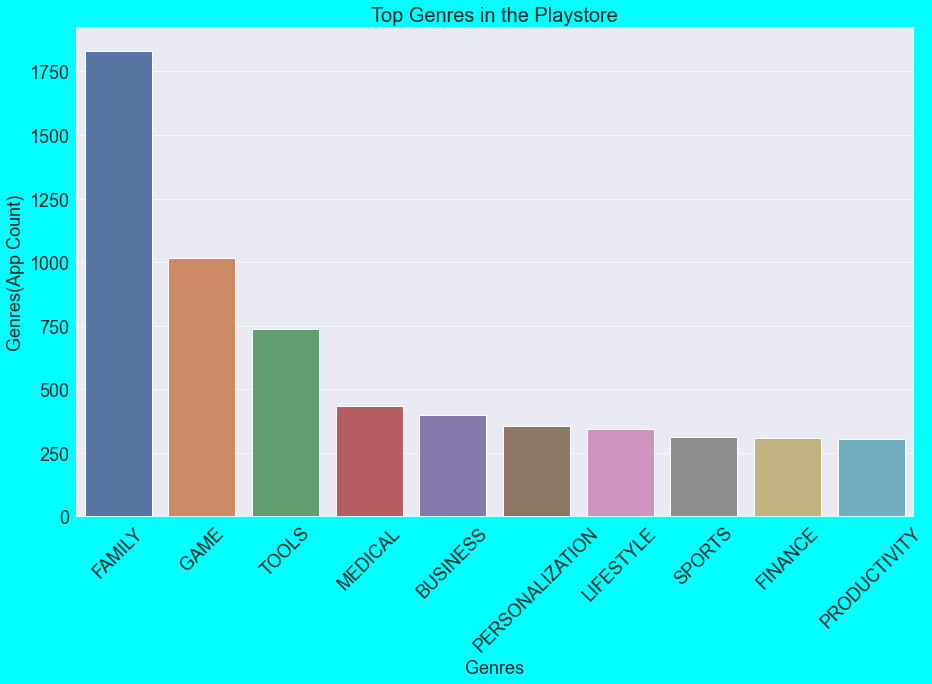

In [134]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3axis,y=y3axis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, fontsize=18)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

Note: From the above visualization we can see that the Highest Number of Apps found in the Tools and Business genres followed by Education, Medical and many more.

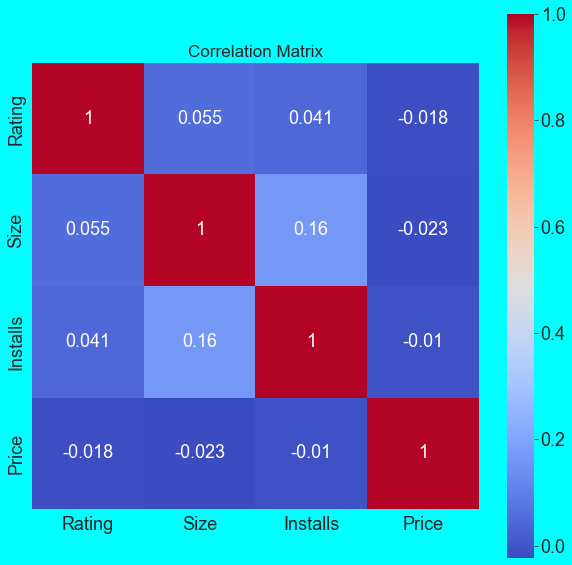

In [135]:
# Calculate correlation between all pairs of variables in the dataframe
corr = df.corr()

# Create a figure with a size of 10x10
plt.figure(figsize=(10,10))

# Plot the correlation matrix using seaborn heatmap function
# cmap sets the color palette to coolwarm, square=True makes the plot a square shape, and annot=True shows the correlation values on the plot
sns.heatmap(corr, cmap="coolwarm", square=True, annot=True)

# Set the title of the plot to "Correlation Matrix" with fontsize of 17
plt.title("Correlation Matrix", fontsize = '17');


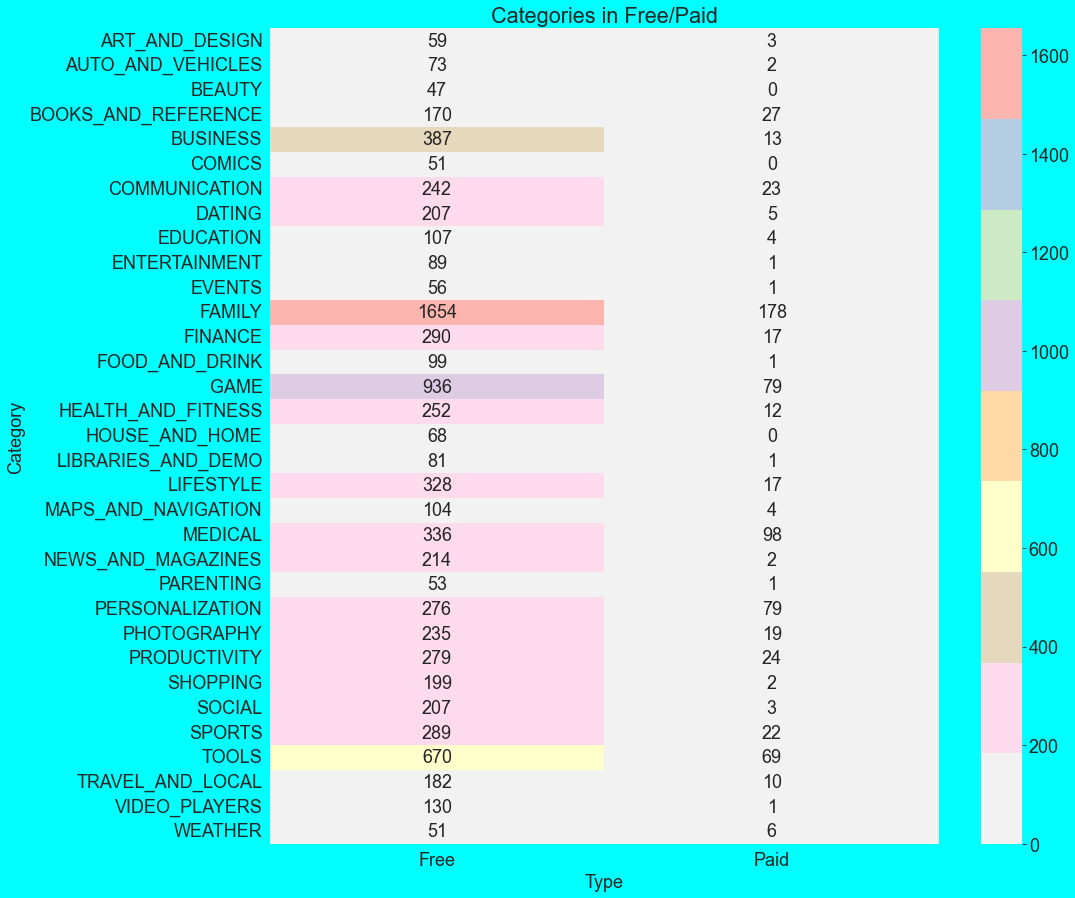

In [136]:
# Create a figure with a size of 15x15
plt.figure(figsize=(15,15))

# Set the title of the plot to "Categories in Free/Paid"
plt.title("Categories in Free/Paid")

# Create a heatmap that shows the cross-tabulation between the 'Category' and 'Type' columns in the dataframe 'df'
# The values of the cross-tabulation are shown as annotations on the heatmap with 'fmt=g', and the color palette used is 'Pastel1_r'
sns.heatmap(pd.crosstab(df['Category'], df["Type"]),annot=True,fmt='g', cmap="Pastel1_r")

# Show the plot
plt.show()


## Using Machine Learning building a fraud detection model which detect the fake downloads

data modeling

C:\Users\nager\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

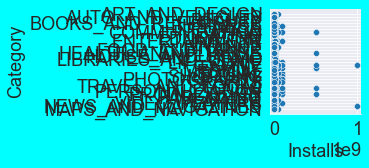

In [137]:
# Create a figure with a size of 40x40
plt.figure(figsize=(40,40))

# Create a pairplot using Seaborn's pairplot() function
# The 'data' parameter specifies the dataframe to use, and the 'x_vars' and 'y_vars' parameters specify the columns to use for the x and y axes, respectively
sns.pairplot(data=df, x_vars=['Installs'], y_vars='Category')

# Show the plot
plt.show()


In [138]:
# Convert the 'Category' column into numerical values using pd.factorize() function
# The [0] selects the first element of the tuple returned by pd.factorize(), which is an array of unique numerical values for each unique category in the original column
# The astype(int) converts the resulting array of numerical values into an array of integers
df['Category'] = pd.factorize(df['Category'])[0].astype(int)

# Convert the 'Type' column into numerical values using pd.factorize() function
# The [0] selects the first element of the tuple returned by pd.factorize(), which is an array of unique numerical values for each unique type in the original column
# The astype(int) converts the resulting array of numerical values into an array of integers
df['Type'] = pd.factorize(df['Type'])[0].astype(int)

# Convert the 'Installs' column into numerical values using pd.factorize() function
# The [0] selects the first element of the tuple returned by pd.factorize(), which is an array of unique numerical values for each unique install value in the original column
# The astype(int) converts the resulting array of numerical values into an array of integers
df['Category'] = pd.factorize(df['Installs'])[0].astype(int)

# Convert the 'Content_Rating' column into numerical values using pd.factorize() function
# The [0] selects the first element of the tuple returned by pd.factorize(), which is an array of unique numerical values for each unique content rating in the original column
# The astype(int) converts the resulting array of numerical values into an array of integers
df['Content_Rating'] = pd.factorize(df['Content_Rating'])[0].astype(int)


<AxesSubplot:>

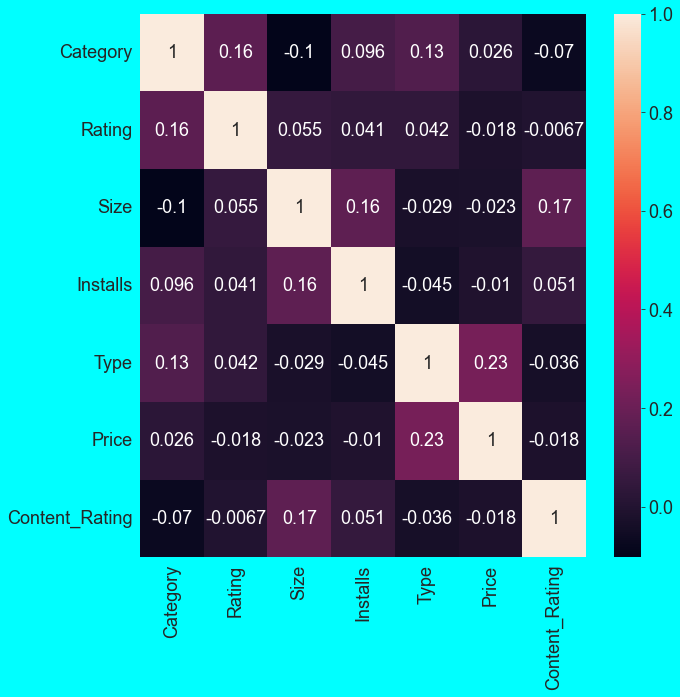

In [139]:
# Compute the correlation matrix for the dataframe using the corr() method
corr = df.corr()

# Create a figure with a size of 10x10
plt.figure(figsize=(10,10))

# Create a heatmap of the correlation matrix using Seaborn's heatmap() function
# The 'data' parameter specifies the correlation matrix to use, and the 'annot' parameter adds the correlation coefficient values to the heatmap
sns.heatmap(df.corr(), annot=True)


Performing Simple linear regression


In [140]:
df = df.drop_duplicates()

In [141]:
df = df.dropna()

In [142]:
# Convert the 'Reviews' column from string type to numeric type using pd.to_numeric() function
# The 'errors' parameter is set to 'coerce' to convert any invalid parsing to NaN values
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert the 'Installs' column from string type to numeric type using pd.to_numeric() function
# The 'errors' parameter is set to 'coerce' to convert any invalid parsing to NaN values
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Convert the 'Rating' column from string type to numeric type using pd.to_numeric() function
# The 'errors' parameter is set to 'coerce' to convert any invalid parsing to NaN values
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [143]:
# Create a new column 'Rating_Count per Installs' by dividing the 'Reviews' column by the 'Installs' column
df['Rating_Count per Installs'] = df['Reviews'] / df['Installs']

# Create a new column 'Rating per Rating_Count' by dividing the 'Rating' column by the 'Reviews' column
df['Rating per Rating_Count'] = df['Rating'] / df['Reviews']


In [144]:
df.drop('Category',axis = 1,inplace =True)

In [145]:
df.drop('Type',axis = 1,inplace =True)

In [146]:
df.drop('Content_Rating',axis = 1,inplace =True)

In [147]:
df.drop('Android_Ver',axis = 1,inplace =True)
df.drop('Genres',axis = 1,inplace =True)
df.drop('Last_Updated',axis = 1,inplace =True)
df.drop('Current_Ver',axis = 1,inplace =True)

In [148]:
# Replace any infinite values (positive or negative) in the dataframe with NaN values using the replace() function from Pandas
# The values to be replaced are specified as a list of [np.inf, -np.inf], and the replacement value is specified as np.nan
df = df.replace([np.inf, -np.inf], np.nan)


In [149]:
df = df.fillna(0)

In [150]:
# Create a new dataframe X by dropping the 'App' and 'Rating' columns from the original dataframe df
X = df.drop(['App', 'Rating'], axis=1)

# Create a new series y that contains the 'Installs' column from the original dataframe df
y = df['Installs']

# Replace any NaN values in the X and y dataframes with 0 using the fillna() method from Pandas
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Split the data into training and testing sets using the train_test_split function from scikit-learn
# The X and y dataframes are split into X_train, X_test, y_train, y_test
# The test_size parameter is set to 0.3, which means that 30% of the data will be used for testing and 70% for training
# The random_state parameter is set to 50 to ensure that the same random split is obtained every time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


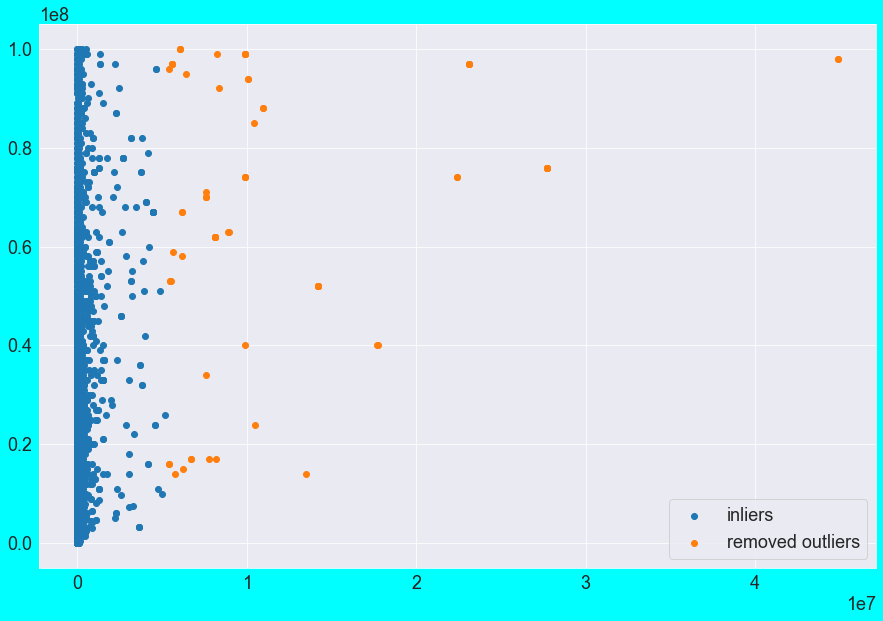

In [151]:
# Set a threshold value
threshold = 3

# Calculate the z-scores of the first column of data
z_scores = np.abs((X_train.iloc[:, 0] - X_train.iloc[:, 0].mean()) / X_train.iloc[:, 0].std())

# Identify the rows that contain outliers
outlier_rows = z_scores > threshold

# Remove outliers from the training data
X_train_no_outliers = X_train[~outlier_rows]
y_train_no_outliers = y_train[~outlier_rows]

# Visualize the inliers and outliers
plt.scatter(X_train_no_outliers.iloc[:, 0], X_train_no_outliers.iloc[:, 1], label='inliers')
plt.scatter(X_train[outlier_rows].iloc[:, 0], X_train[outlier_rows].iloc[:, 1], label='removed outliers')
plt.legend()
plt.show()

In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6171 entries, 8606 to 7362
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reviews                    6171 non-null   int64  
 1   Size                       6171 non-null   float64
 2   Installs                   6171 non-null   float64
 3   Price                      6171 non-null   float64
 4   Rating_Count per Installs  6171 non-null   float64
 5   Rating per Rating_Count    6171 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 337.5 KB


In [153]:
# Add a constant column of 1s to the X_train dataframe using the add_constant() function from statsmodels
X_train_sm = sm.add_constant(X_train)

# Print the first few rows of the X_train_sm dataframe to verify that the constant column has been added
X_train_sm.head()


C:\Users\nager\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Reviews,Size,Installs,Price,Rating_Count per Installs,Rating per Rating_Count
8606,1.0,0,19000000.0,10.0,0.00,0.000000,0.000000
719,1.0,748,51000000.0,1000000.0,0.00,0.000748,0.005882
8674,1.0,1853,5800000.0,500000.0,0.00,0.003706,0.002321
8924,1.0,265,8200000.0,50000.0,0.00,0.005300,0.016604
6692,1.0,0,5400000.0,0.0,154.99,0.000000,0.000000


In [154]:
# Create an OLS regression model using the OLS() function from statsmodels
# The independent variable is y_train, and the dependent variables are the columns in X_train_sm
lr = sm.OLS(y_train, X_train_sm)

# Fit the OLS regression model using the fit() method
lr_model = lr.fit()

# Print the coefficients of the fitted OLS regression model
lr_model.params


const                       -1.568696e-08
Reviews                     -6.661338e-15
Size                         1.387779e-17
Installs                     1.000000e+00
Price                        5.343281e-11
Rating_Count per Installs   -6.286427e-09
Rating per Rating_Count      1.979060e-09
dtype: float64

In [155]:
lr_model.summary() # this shows the summary of the model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.715e+33
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        23:14:25   Log-Likelihood:             1.0042e+05
No. Observations:                6171   AIC:                        -2.008e+05
Df Residuals:                    6164   BIC:                        -2.008e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.569e-08   3.89e-10    -40.359      0.000   -1.64e-08   -1.49e-08
Reviews                   -6.661e-15   2.15e-16    -31.014      0.000   -7.08e-15   -6.24e-15
Size                       1.388e-17   1.21e-17      1.143      0.253   -9.93e-18    3.77e-17
Installs                      1.0000   7.85e-18   1.27e+17      0.000       1.000       1.000
Price                      5.343e-11   1.77e-11      3.019      0.003    1.87e-11    8.81e-11
Rating_Count per Installs -6.286e-09   2.45e-09     -2.569      0.010   -1.11e-08   -1.49e-09
Rating per Rating_Count    1.979e-09   3.24e-10      6.102      0.000    1.34e-09    2.61e-09
==============================================================================
Omnibus:                    11954.085   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46075266.360
Skew:                         -14.894   Prob(JB):                         0.00
Kurtosis:                     425.264   Cond. No.                     4.26e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
print(X_train.shape)          # Print the shape of the X_train dataset
print(type(X_train))         # Print the data type of X_train
print(X_train.shape)         # Print the shape of the X_train dataset
print(y_train.shape)         # Print the shape of the y_train dataset

X_train_lm = X_train.values.reshape(-1,1)  # Reshape the X_train dataset to have a single feature column
y_train_lm = y_train.values.reshape(-1,1)  # Reshape the y_train dataset to have a single feature column


(6171, 6)
<class 'pandas.core.frame.DataFrame'>
(6171, 6)
(6171,)


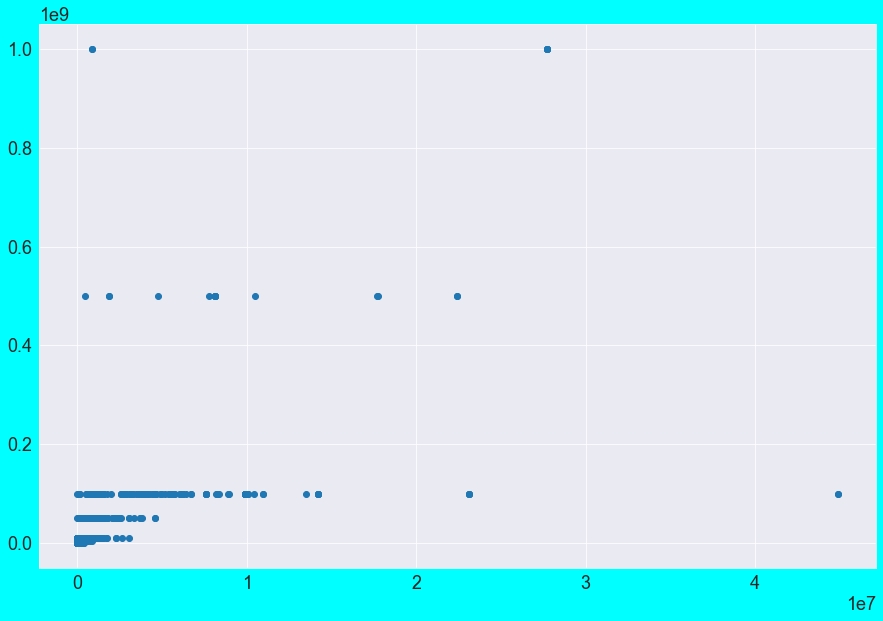

In [157]:
plt.scatter(X_train.iloc[:, 0], y_train)   # Generate a scatter plot of the first column of X_train against y_train
plt.show()                                 # Show the plot


In [158]:
y_train_pred = lr_model.predict(X_train_sm)  # Use the lr_model to predict the values of y_train for the X_train_sm dataset
y_train_pred                                 # Print the predicted values of y_train


8606     1.000000e+01
719      1.000000e+06
8674     5.000000e+05
8924     5.000000e+04
6692    -7.330473e-09
             ...     
10259    1.000000e+04
8011     5.000000e+02
10324    1.000000e+03
8055     5.000000e+02
7362     1.000000e+03
Length: 6171, dtype: float64

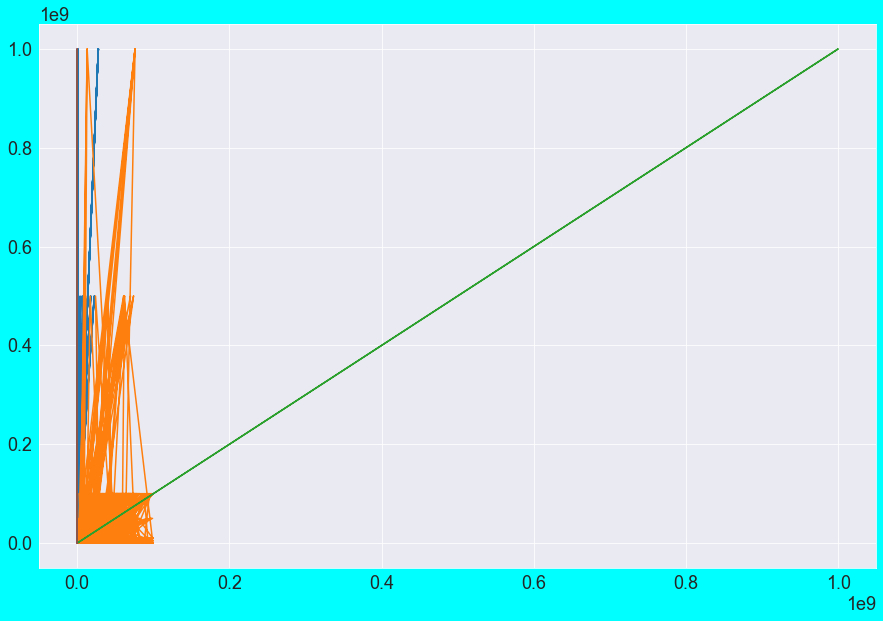

In [159]:
plt.plot(X_train,y_train_pred)   # Generate a line plot of the predicted values of y_train against X_train
plt.show()                       # Show the plot


In [160]:
residual = y_train - y_train_pred  # Calculate the residuals by subtracting the predicted y_train values from the actual y_train values
residual                          # Print the residuals

8606     1.542328e-08
719      1.455192e-08
8674     1.542503e-08
8924     1.555600e-08
6692     7.330473e-09
             ...     
10259    1.473018e-08
8011     1.133714e-08
10324    1.441822e-08
8055     1.415822e-08
7362     1.553246e-08
Length: 6171, dtype: float64

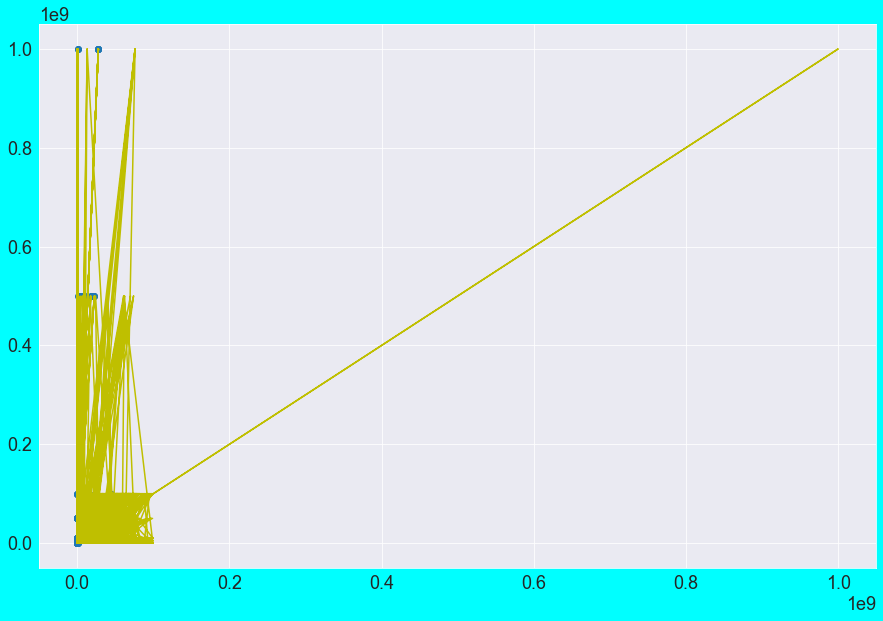

In [161]:
plt.scatter(X_train.iloc[:,0],y_train)    # Generate a scatter plot of the first column of X_train against y_train
plt.plot(X_train,y_train_pred,'y')        # Generate a line plot of the predicted values of y_train against X_train, with a yellow color ('y')
plt.show()                                # Show the plot


C:\Users\nager\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

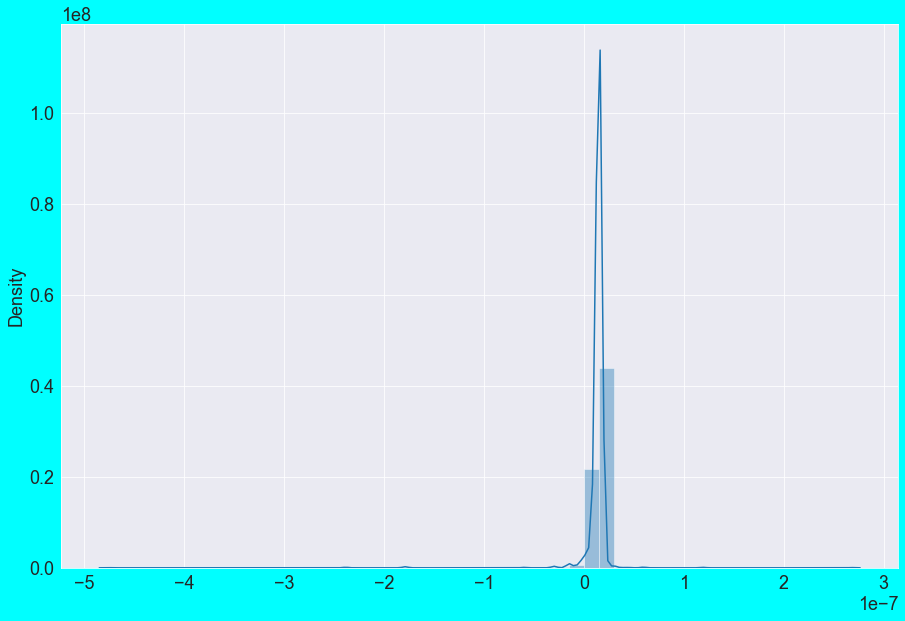

In [162]:
plt.figure()             # Create a new figure
sns.distplot(residual)   # Generate a histogram and density plot of the residuals using seaborn library

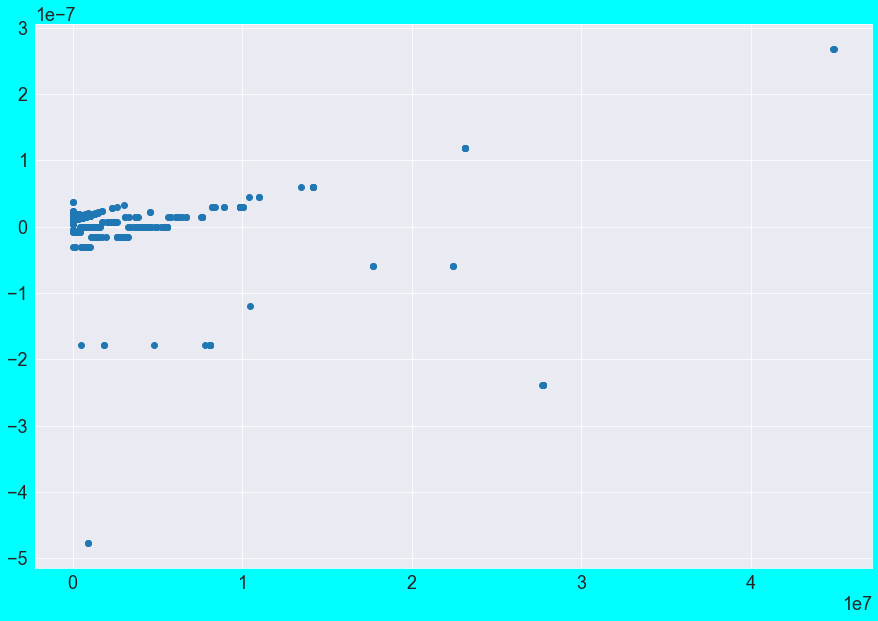

In [163]:
plt.scatter(X_train.iloc[:,0],residual)   # Generate a scatter plot of the first column of X_train against the residuals
plt.show()                                # Show the plot


In [164]:
X_test_sm = sm.add_constant(X_test)     # Add a constant to X_test
y_test_pred = lr_model.predict(X_test_sm)   # Predict the target variable using X_test


C:\Users\nager\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [165]:
r2 = r2_score(y_true = y_train,y_pred =y_train_pred)
r2 #R-squared is a measure of how well the linear regression model fits the data, and it ranges from 0 to 1. A value of 1 indicates a perfect fit, where the model explains all the variability in the data. A value of 0 indicates that the model does not explain any of the variability in the data.

1.0

In [166]:
mean_squared_error(y_true = y_train,y_pred = y_train_pred)
#MSE is a measure of the average squared difference between the true and predicted values. A smaller MSE indicates a better fit of the model to the data.

4.2983263960565705e-16

In [167]:
mse = mean_squared_error(y_true=y_train, y_pred = y_train_pred)
rmse = np.sqrt(mse) #np.sqrt(mse) takes the square root of the MSE to obtain the RMSE.
rmse #RMSE is a measure of the average deviation of the predicted values from the true values, in the same units as the target variable. A smaller RMSE indicates a better fit of the model to the data.

2.0732405543150487e-08

In [199]:
X_train_lm = X_train_lm[:6171] # This code is selecting the first 6171 rows of the X_train_lm array and assigning it to X_train_lm.

In [200]:
lm = LinearRegression()
lm.fit(X_train_lm,y_train)
#This code is creating an instance of the LinearRegression class and then fitting the model to the training data X_train_lm and y_train using the fit() method.
#This will train a linear regression model to predict the target variable y_train based on the features in X_train_lm.

LinearRegression()

In [201]:
# Create an instance of the LogisticRegression algorithm with L2 regularization
log_reg = LogisticRegression(penalty='l2', C=.8)

# Fit the algorithm to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

C:\Users\nager\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [202]:
#This code is calculating the accuracy score of a logistic regression model on the test data. It uses the score() method of the logistic regression model logreg and passes in the test features X_test and the test target y_test. 
acc_log = round(logreg.score(X_test, y_test) * 100, 2)##The resulting accuracy score is multiplied by 100 and rounded to two decimal places using the round() function, and stored in the variable acc_lo
acc_log

C:\Users\nager\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


25.03

In [209]:
accuracy = accuracy_score(y_test, y_pred)*100  # this is code is for finding the accuracy of the model 
accuracy

99.8109640831758

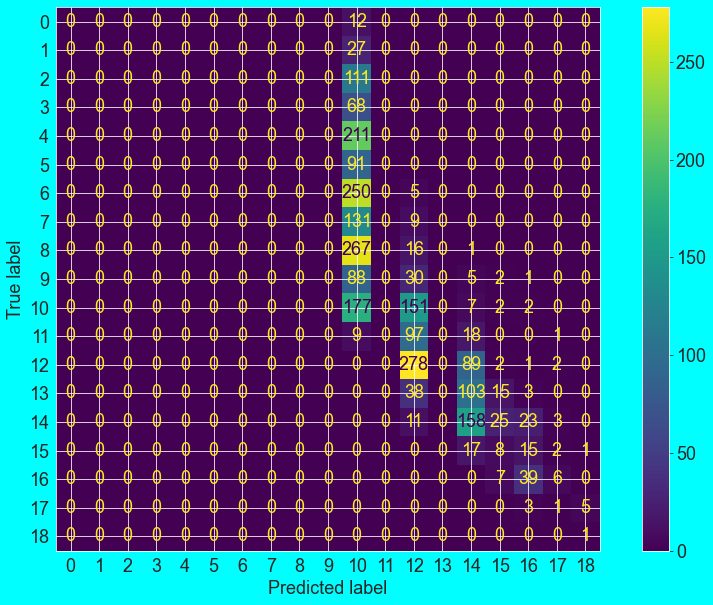

In [204]:
cm = confusion_matrix(y_test, y_pred) # compute the confusion matrix
u = ConfusionMatrixDisplay(cm) # create a ConfusionMatrixDisplay object with the confusion matrix
u.plot() # plot the confusion matrix
plt.show() # show the plot

Accuracy = 99.81 %


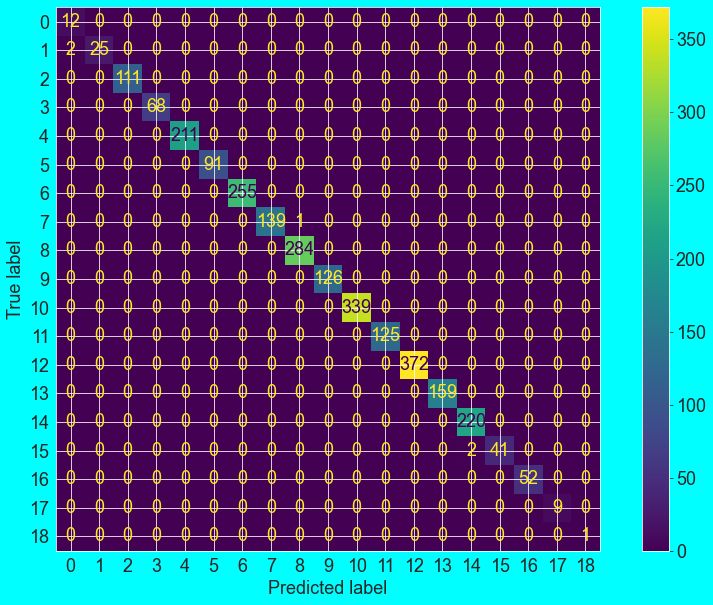

In [206]:
rf_model = RandomForestClassifier() # create a random forest model
rf_model.fit(X_train, y_train) # fit the model to the training data
y_pred = rf_model.predict(X_test) # predict the target variable for the test data
rf_acc = accuracy_score(y_pred, y_test) * 100 # compute the accuracy score
print("Accuracy =", round(rf_acc, 2), "%") # print the accuracy score
cm = confusion_matrix(y_test, y_pred) # compute the confusion matrix
u = ConfusionMatrixDisplay(cm) # create a ConfusionMatrixDisplay object with the confusion matrix
u.plot() # plot the confusion matrix
plt.show() # show the plot

In [207]:
target_names = ['NoRating', 'Less than 10K', 'Between 10K and 500K', 'More than 500K'] # create a list of target names
cr = classification_report(y_test, y_pred, target_names=target_names) # compute the classification report
print("Classification Report for RandomForestClassifier")
print(cr)

Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

         1.0       0.86      1.00      0.92        12
         5.0       1.00      0.93      0.96        27
        10.0       1.00      1.00      1.00       111
        50.0       1.00      1.00      1.00        68
       100.0       1.00      1.00      1.00       211
       500.0       1.00      1.00      1.00        91
      1000.0       1.00      1.00      1.00       255
      5000.0       1.00      0.99      1.00       140
     10000.0       1.00      1.00      1.00       284
     50000.0       1.00      1.00      1.00       126
    100000.0       1.00      1.00      1.00       339
    500000.0       1.00      1.00      1.00       125
   1000000.0       1.00      1.00      1.00       372
   5000000.0       1.00      1.00      1.00       159
  10000000.0       0.99      1.00      1.00       220
  50000000.0       1.00      0.95      0.98        43
 100000000.0       1.00      1.0